# Import Library

In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import os

# import MNIST dataset

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# Check Datasets

In [3]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

print("Shape of image: {}".format(data.train.images[0].shape))
print("Shape of label: {}".format(data.train.labels[0].shape))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000
Shape of image: (784,)
Shape of label: (10,)


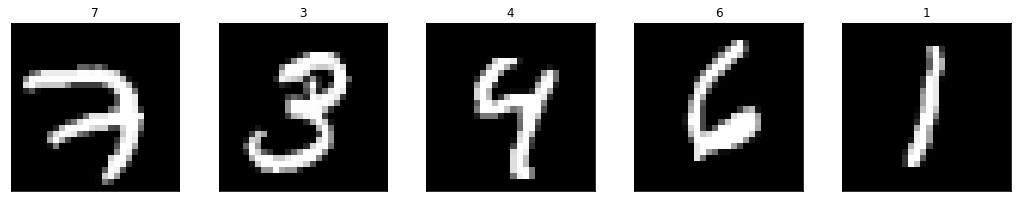

In [4]:
n = 5
plt.figure(figsize=(18,18))
for i in range(5):
    plt.subplot(n, n, i+1)
    plt.imshow(data.train.images[i].reshape(28,28), cmap='gray')
    plt.title(np.argmax(data.train.labels[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

# SETUP Function

In [5]:
# Placeholder variable for the input images
x = tf.placeholder(tf.float32, shape=[None, 28*28], name='X')
# Reshape it into [num_images, img_height, img_width, num_channels]
x_image = tf.reshape(x, [-1, 28, 28, 1])

# Placeholder variable for the true labels associated with the images
y_true = tf.placeholder(tf.float32, shape=[None, 10], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

dropout = 0.75

Instructions for updating:
Use the `axis` argument instead


In [6]:
def new_conv_layer(input, num_input_channels, filter_size, num_filters, name):
    
    with tf.variable_scope(name) as scope:
        # Shape of the filter-weights for the convolution
        shape = [filter_size, filter_size, num_input_channels, num_filters]

        # Create new weights (filters) with the given shape
        weights = tf.Variable(tf.truncated_normal(shape, stddev=0.05))

        # Create new biases, one for each filter
        biases = tf.Variable(tf.constant(0.05, shape=[num_filters]))
        
        #print(input)
        #print(weights)
        # TensorFlow operation for convolution
        layer = tf.nn.conv2d(input=input, filter=weights, strides=[1, 1, 1, 1], padding='SAME')
        
        # Add the biases to the results of the convolution.
        layer += biases
        
        return layer, weights

In [7]:
def new_pool_2Dlayer(input, name):
    
    with tf.variable_scope(name) as scope:
        # TensorFlow operation for convolution
        layer = tf.nn.max_pool(value=input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        
        return layer

In [8]:
def new_relu_layer(input, name):
    
    with tf.variable_scope(name) as scope:
        # TensorFlow operation for convolution
        layer = tf.nn.relu(input)
        
        return layer

In [9]:
def new_fc_layer(input, num_inputs, num_outputs, name):
    
    with tf.variable_scope(name) as scope:

        # Create new weights and biases.
        weights = tf.Variable(tf.truncated_normal([num_inputs, num_outputs], stddev=0.05))
        biases = tf.Variable(tf.constant(0.05, shape=[num_outputs]))
        
        # Multiply the input and weights, and then add the bias-values.
        layer = tf.matmul(input, weights) + biases
        
        return layer

In [10]:
def fc_layer_dropout(input, keep_prob, name):
    with tf.variable_scope(name) as scope:
        return tf.nn.dropout(input, keep_prob)

In [11]:
### ---
# Convolutional Layer 1
layer_conv1, weights_conv1 = new_conv_layer(input=x_image, num_input_channels=1, filter_size=5, num_filters=32, name ="conv_layer_1")

# Pooling Layer 1
layer_pool1 = new_pool_2Dlayer(layer_conv1, name="maxpool2D_1")

# RelU layer 1
layer_relu1 = new_relu_layer(layer_pool1, name="actv_relu_1")

#Convolutional Layer 2
layer_conv2, weights_conv2 = new_conv_layer(input=layer_relu1, num_input_channels=32, filter_size=5, num_filters=64, name= "conv_layer_2")

# Pooling Layer 2
layer_pool2 = new_pool_2Dlayer(layer_conv2, name="maxpool2D_2")

# RelU layer 2
layer_relu2 = new_relu_layer(layer_pool2, name="actv_relu_2")

# Convolutional Layer 3
layer_conv3, weights_conv3 = new_conv_layer(input=layer_relu2, num_input_channels=64, filter_size=10, num_filters=128, name= "conv_layer_3")

# Pooling Layer 3
layer_pool3 = new_pool_2Dlayer(layer_conv3, name="maxpool2D_3")

# RelU layer 3
layer_relu3 = new_relu_layer(layer_pool3, name="actv_relu_3")

# # Convolutional Layer 4
# layer_conv4, weights_conv4 = new_conv_layer(input=layer_relu3, num_input_channels=128, filter_size=10, num_filters=256, name= "conv4")

# # Pooling Layer 4
# layer_pool4 = new_pool_layer(layer_conv4, name="pool4")

# # RelU layer 4
# layer_relu4 = new_relu_layer(layer_pool4, name="relu4")

# Flatten Layer
num_features = layer_relu3.get_shape()[1:4].num_elements()
layer_flat = tf.reshape(layer_relu3, [-1, num_features])

# Fully-Connected Layer 1
layer_fc1 = new_fc_layer(layer_flat, num_inputs=num_features, num_outputs=128, name="fully_con_1")

# RelU layer 3
layer_relu4 = new_relu_layer(layer_fc1, name="actv_relu_4")

# Fully-Connected Layer 2
layer_fc2 = new_fc_layer(input=layer_relu4, num_inputs=128, num_outputs=10, name="fully_con_2")

#layer_fc2 = fc_layer_dropout(layer_fc2, dropout, name="dropout_1")

# # RelU layer 3
# layer_relu5 = new_relu_layer(layer_fc2, name="relu5")

# # Fully-Connected Layer 2
# layer_fc3 = new_fc_layer(input=layer_relu5, num_inputs=15, num_outputs=15, name="fc3")



Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# Use Softmax function to normalize the output
with tf.variable_scope("Softmax"):
    y_pred = tf.nn.softmax(layer_fc2)
    y_pred_cls = tf.argmax(y_pred, dimension=1)

In [13]:
# Use Cross entropy cost function
with tf.name_scope("cross_ent"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2, labels=y_true)
    cost = tf.reduce_mean(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [14]:
# Use Adam Optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [15]:

# Accuracy
with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(y_pred_cls, y_true_cls)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [16]:
# Trainable variables
vart_list = tf.trainable_variables()

In [17]:
# Initialize the FileWriter
writer = tf.summary.FileWriter("0656555_graph/")
writer1 = tf.summary.FileWriter("0656555_testing/")

In [18]:
# Add the cost and accuracy to summary
tf.summary.scalar('loss', cost)
tf.summary.scalar('accuracy', accuracy)

# Add the trainable variables to summary 
for var in vart_list:
    tf.summary.histogram(var.name, var)

# Merge all summaries together
merged_summary = tf.summary.merge_all()

INFO:tensorflow:Summary name conv_layer_1/Variable:0 is illegal; using conv_layer_1/Variable_0 instead.
INFO:tensorflow:Summary name conv_layer_1/Variable_1:0 is illegal; using conv_layer_1/Variable_1_0 instead.
INFO:tensorflow:Summary name conv_layer_2/Variable:0 is illegal; using conv_layer_2/Variable_0 instead.
INFO:tensorflow:Summary name conv_layer_2/Variable_1:0 is illegal; using conv_layer_2/Variable_1_0 instead.
INFO:tensorflow:Summary name conv_layer_3/Variable:0 is illegal; using conv_layer_3/Variable_0 instead.
INFO:tensorflow:Summary name conv_layer_3/Variable_1:0 is illegal; using conv_layer_3/Variable_1_0 instead.
INFO:tensorflow:Summary name fully_con_1/Variable:0 is illegal; using fully_con_1/Variable_0 instead.
INFO:tensorflow:Summary name fully_con_1/Variable_1:0 is illegal; using fully_con_1/Variable_1_0 instead.
INFO:tensorflow:Summary name fully_con_2/Variable:0 is illegal; using fully_con_2/Variable_0 instead.
INFO:tensorflow:Summary name fully_con_2/Variable_1:0 

# Do Training

In [19]:
num_epochs = 3
batch_size = 100

In [20]:

with tf.Session() as sess:
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    
    # Add the model graph to TensorBoard
    writer.add_graph(sess.graph)
    
    # for display purpose
    batch_count = 0
    total_time = 0
    step_disp = 50
    # Loop over number of epochs
    for epoch in range(num_epochs):
        
        start_time = time.time()
        train_accuracy = 0
        num_batch = int(len(data.train.labels)/batch_size)
        for batch in range(0, num_batch):
            
            # Get a batch of images and labels
            x_batch, y_true_batch = data.train.next_batch(batch_size)
            
            # Put the batch into a dict with the proper names for placeholder variables
            feed_dict_train = {x: x_batch, y_true: y_true_batch}
            
            # Run the optimizer using this batch of training data.
            sess.run(optimizer, feed_dict=feed_dict_train)
            
            # Calculate the accuracy on the batch of training data
            #train_accuracy += sess.run(accuracy, feed_dict=feed_dict_train)
            train_accuracy += sess.run(accuracy, feed_dict=feed_dict_train)
            temp_train_accuracy = train_accuracy / (batch+1)
            batch_count += 1
            if((batch_count % step_disp) == 0):
                print("Big loop: "+str(epoch+1)+" Steps "+str(batch_count)+",Training Accuracy:\t{0:.3f}".format(temp_train_accuracy))
            
            # Generate summary with the current batch of data and write to file
            summ = sess.run(merged_summary, feed_dict=feed_dict_train)
            writer.add_summary(summ, epoch*int(len(data.train.labels)/batch_size) + batch)
            
          
        train_accuracy /= int(len(data.train.labels)/batch_size)
        
        # Generate summary and validate the model on the entire validation set
#         summ, vali_accuracy = sess.run([merged_summary, accuracy], feed_dict={x:data.validation.images, y_true:data.validation.labels})
#         writer1.add_summary(summ, epoch)
        summ, testing_accuracy = sess.run([merged_summary, accuracy], feed_dict={x:data.test.images, y_true:data.test.labels})
        writer1.add_summary(summ, epoch)
        

        end_time = time.time()
        
        # Save checkpoint of the model
        checkpoint_name = os.path.join("Checkpoints/", 'model_epoch'+str(epoch+1)+'.ckpt')
        save_path = tf.train.Saver().save(sess, checkpoint_name)  
        
        #print("Steps "+str(epoch+1)+",Training Accuracy:\t{}".format(train_accuracy))
        #print(str(epoch)+" "+str(num_epochs))
        total_time += int(end_time-start_time)
        if(epoch == num_epochs-1):
            print("Testing Accuracy:\t{}".format(testing_accuracy))
            print("Time usage "+str(total_time)+" seconds")
            
        
        #print("Epoch "+str(epoch+1)+" completed : Time usage "+str(int(end_time-start_time))+" seconds")
        #print("\tAccuracy:")
        #print ("\t- Training Accuracy:\t{}".format(train_accuracy))
        #print ("\t- Validation Accuracy:\t{}".format(vali_accuracy))

Big loop: 1 Steps 50,Training Accuracy:	0.512
Big loop: 1 Steps 100,Training Accuracy:	0.656
Big loop: 1 Steps 150,Training Accuracy:	0.725
Big loop: 1 Steps 200,Training Accuracy:	0.769
Big loop: 1 Steps 250,Training Accuracy:	0.800
Big loop: 1 Steps 300,Training Accuracy:	0.821
Big loop: 1 Steps 350,Training Accuracy:	0.837
Big loop: 1 Steps 400,Training Accuracy:	0.851
Big loop: 1 Steps 450,Training Accuracy:	0.861
Big loop: 1 Steps 500,Training Accuracy:	0.871
Big loop: 1 Steps 550,Training Accuracy:	0.879
Big loop: 2 Steps 600,Training Accuracy:	0.955
Big loop: 2 Steps 650,Training Accuracy:	0.959
Big loop: 2 Steps 700,Training Accuracy:	0.960
Big loop: 2 Steps 750,Training Accuracy:	0.962
Big loop: 2 Steps 800,Training Accuracy:	0.963
Big loop: 2 Steps 850,Training Accuracy:	0.964
Big loop: 2 Steps 900,Training Accuracy:	0.965
Big loop: 2 Steps 950,Training Accuracy:	0.966
Big loop: 2 Steps 1000,Training Accuracy:	0.967
Big loop: 2 Steps 1050,Training Accuracy:	0.968
Big loop: 2 

# Graph TensorBoard

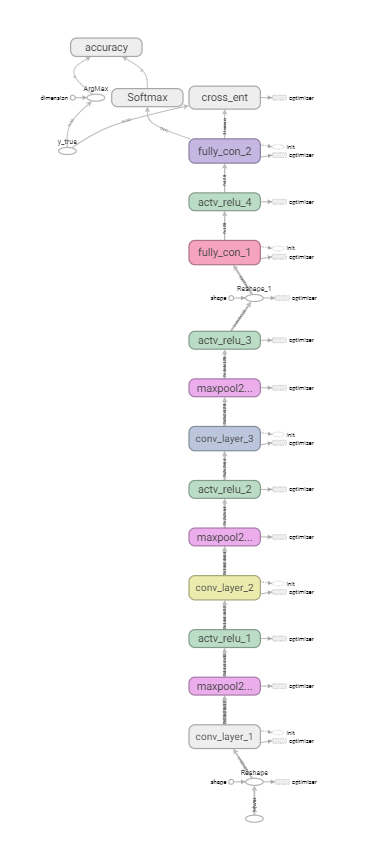

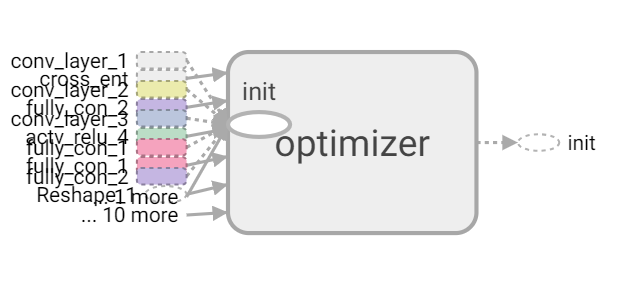

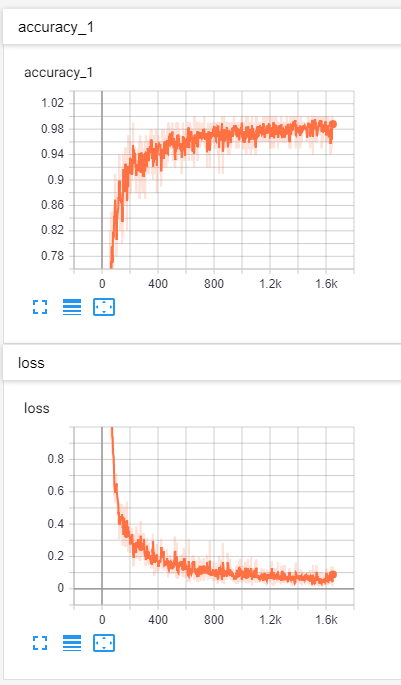

# REFERENCE LINK

In [ ]:
# https://missinglink.ai/guides/deep-learning-frameworks/tensorflow-conv2d-layers-practical-guide/
# https://medium.com/data-science-group-iitr/building-a-convolutional-neural-network-in-python-with-tensorflow-d251c3ca8117